In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [427]:
Tennis = pd.read_csv("Tennis.csv") 

In [428]:
#update wt/ht to make int (also remove parentheses and kg/cm)
Tennis.ht = pd.Series([int(re.sub("[cm()]",'',str(x))) if x is not np.nan else x for x in Tennis.ht])
Tennis.wt = pd.Series([int(re.sub("[kg()]",'',str(x))) if x is not np.nan else x for x in Tennis.wt])

In [429]:
#Split Tennis into Ten0/Ten1 based on having missing birthplace
Ten0 = Tennis[Tennis.birthplace.isna()] 
Ten1 = Tennis[Tennis.birthplace.notna()]


In [430]:
#Compare both groups
print('Mean0= ', Ten0['rank_2020'].mean())
print('Mean1= ',Ten1['rank_2020'].mean())

print('Min0= ', Ten0['rank_2020'].min())
print('Min1= ',Ten1['rank_2020'].min())

print('Max0= ', Ten0['rank_2020'].max())
print('Max1= ',Ten1['rank_2020'].max())

Mean0=  1222.4812030075188
Mean1=  611.3678160919541
Min0=  0
Min1=  0
Max0=  1928
Max1=  1922


In [431]:
#Look at missing in Ten1 group (looks fairly solid)
Ten1.isnull().sum()

age                1
backhand           1
birthplace         0
f_name             0
finals_career      0
ht                34
l_hand             1
l_name             0
loss_career        0
prize_career       0
rank_2020          0
rank_career        0
titles_career      0
win_career         0
wt                22
yr_pro           490
dtype: int64

In [432]:
Tennis['birth_missing'] = np.where(Tennis.birthplace.isna(), '1', '0')

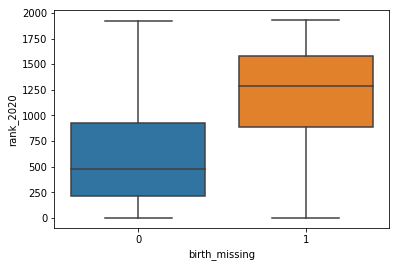

In [433]:
#Compare both groups using boxplot
sns.boxplot(x="birth_missing", y="rank_2020", data=Tennis)

plt.show()

In [434]:
#missing stats for ht/wt
Ten1[Ten1.ht.isna() & Ten1.wt.isna()].isnull().sum() #remove those having both ht/wt missing (21 total)

age               0
backhand          1
birthplace        0
f_name            0
finals_career     0
ht               21
l_hand            1
l_name            0
loss_career       0
prize_career      0
rank_2020         0
rank_career       0
titles_career     0
win_career        0
wt               21
yr_pro           21
dtype: int64

In [435]:
Ten1[Ten1.ht.notna() | Ten1.wt.notna()].isnull().sum() #this is what we will keep (mutate NA's)--850 total remain

age                1
backhand           0
birthplace         0
f_name             0
finals_career      0
ht                13
l_hand             0
l_name             0
loss_career        0
prize_career       0
rank_2020          0
rank_career        0
titles_career      0
win_career         0
wt                 1
yr_pro           469
dtype: int64

In [436]:
#remove yr_pro (since missing significantly, will not be used)
Ten1.drop('yr_pro', axis=1, inplace=True)

In [437]:
Ten1.shape #shape before removing missing (ck)

(870, 15)

In [438]:
#remove all ht or wt not NA (remove if missing both ht/wt)
Ten1 = Ten1[Ten1.ht.notna() | Ten1.wt.notna()]
Ten1.shape #shape after removing missing (ck)

(849, 15)

In [439]:
#fill remaining NA's with mean for respective cols
Ten1.fillna(Ten1.mean(), inplace=True)

#ck for any remaining NA's (should not be any)
Ten1.isnull().sum()

age              0
backhand         0
birthplace       0
f_name           0
finals_career    0
ht               0
l_hand           0
l_name           0
loss_career      0
prize_career     0
rank_2020        0
rank_career      0
titles_career    0
win_career       0
wt               0
dtype: int64

In [ ]:
#Start Explortion--Ten1 contains full study data

In [440]:
Ten1.head()

,age,backhand,birthplace,f_name,finals_career,ht,l_hand,l_name,loss_career,prize_career,rank_2020,rank_career,titles_career,win_career,wt
0,32.0,Two-Handed Backhand,Serbia,Novak,34,188.0,Right-Handed,Djokovic,187,143059955.0,1,1,78,906,77.0
1,38.0,One-Handed Backhand,Spain,Feliciano,11,188.0,Left-Handed,Lopez,448,17350913.0,53,12,7,488,88.0
2,22.0,Two-Handed Backhand,Russia,Alexander,2,198.0,Right-Handed,Bublik,29,1347179.0,55,48,0,25,77.0
3,28.0,Two-Handed Backhand,Hungary,Marton,1,188.0,Right-Handed,Fucsovics,73,2970914.0,73,31,1,74,82.0
4,24.0,Two-Handed Backhand,Italy,Lorenzo,0,191.0,Right-Handed,Sonego,35,1342272.0,52,46,1,25,76.0


In [441]:
#replace small error in birthplace (typos)
Ten1.loc[Ten1['birthplace'].str.contains('U.S.A.'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('CA'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('California'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Florida'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Ohio'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('NC'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('New York'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Illinois'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('IA'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('IL'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('OH'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Idaho'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Michigan'), 'birthplace'] = 'USA'
Ten1.loc[Ten1['birthplace'].str.contains('Scotland'), 'birthplace'] = 'England'
Ten1.loc[Ten1['birthplace'].str.contains('Great Britain'), 'birthplace'] = 'England'
Ten1.loc[Ten1['birthplace'].str.contains('Bosnia & Herzegovina'), 'birthplace'] = 'Bosnia-Herzegovina'
Ten1.loc[Ten1['birthplace'].str.contains('Cyrprus'), 'birthplace'] = 'Cyprus'
Ten1.loc[Ten1['birthplace'].str.contains('South Australia'), 'birthplace'] = 'Australia'
Ten1.loc[Ten1['birthplace'].str.contains('Slovak Republic'), 'birthplace'] = 'Slovakia'
Ten1.loc[Ten1['birthplace'].str.contains('CZE'), 'birthplace'] = 'Czech Republic'
Ten1.loc[Ten1['birthplace'].str.contains('chile'), 'birthplace'] = 'Chile'
Ten1.loc[Ten1['birthplace'].str.contains('BRA'), 'birthplace'] = 'Brazil'
Ten1.loc[Ten1['birthplace'].str.contains('Chinese Taipei'), 'birthplace'] = 'Taiwan'
Ten1.loc[Ten1['birthplace'].str.contains('The Netherlands'), 'birthplace'] = 'Netherlands'

In [443]:
#remove 4 rows having rank_2020=0 (mostly trivial values)
Ten1 = Ten1[Ten1.rank_2020 != 0]

In [444]:
Ten1[Ten1.rank_2020==6]

,age,backhand,birthplace,f_name,finals_career,ht,l_hand,l_name,loss_career,prize_career,rank_2020,rank_career,titles_career,win_career,wt
1924,21.0,One-Handed Backhand,Greece,Stefanos,5,193.0,Right-Handed,Tsitsipas,66,10824098.0,6,5,4,107,89.0


In [446]:
Ten1.groupby('birthplace')['birthplace'].count().nlargest(75)

#Ten1.groupby('birthplace')['rank_2020'].min().nsmallest(75)

birthplace
USA                   88
France                68
Italy                 53
Argentina             42
Germany               39
Spain                 38
Russia                36
Japan                 29
Australia             28
Brazil                22
India                 21
China                 20
England               18
Czech Republic        17
Serbia                17
Switzerland           14
Canada                13
Poland                13
Ukraine               13
Belgium               12
Romania               12
Portugal              11
Slovakia              11
Sweden                11
Colombia              10
Netherlands           10
Austria                9
South Africa           9
Mexico                 8
Uzbekistan             8
                      ..
Tunisia                4
Turkey                 4
Bolivia                3
Ecuador                3
Egypt                  3
Latvia                 3
Moldova                3
Peru                   3
Thailand      